Implementation of LSTM Model on AUD_USD_D prediction of the close price 1 hour ahead based on data of previous 10 hours


## 1. Data Preparation

### 1.1 Read in data file

In [1]:
import talib as ta

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from utils import series_to_supervised

In [2]:
data = pd.read_csv('../data/AUD_USD_D.csv')
data

,datetime,open,high,low,close
0,2005-01-01T22:00:00.000000000Z,0.78230,0.78280,0.78060,0.78060
1,2005-01-02T22:00:00.000000000Z,0.78070,0.78390,0.77265,0.77835
2,2005-01-03T22:00:00.000000000Z,0.77835,0.78015,0.76360,0.76490
3,2005-01-04T22:00:00.000000000Z,0.76500,0.76840,0.75940,0.76480
4,2005-01-05T22:00:00.000000000Z,0.76480,0.76510,0.75770,0.76080
...,...,...,...,...,...
4815,2021-02-21T22:00:00.000000000Z,0.78715,0.79292,0.78554,0.79162
4816,2021-02-22T22:00:00.000000000Z,0.79146,0.79347,0.78804,0.79115
4817,2021-02-23T22:00:00.000000000Z,0.79129,0.79732,0.78954,0.79682
4818,2021-02-24T22:00:00.000000000Z,0.79676,0.80072,0.78590,0.78719


### 1.2 Datetime formatting

In [3]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['datetime'] = data['datetime'].dt.date
# data['datetime'] = data['datetime'].dt.tz_localize(None)
data.set_index('datetime', inplace=True)
data

,open,high,low,close
datetime,,,,
2005-01-01,0.78230,0.78280,0.78060,0.78060
2005-01-02,0.78070,0.78390,0.77265,0.77835
2005-01-03,0.77835,0.78015,0.76360,0.76490
2005-01-04,0.76500,0.76840,0.75940,0.76480
2005-01-05,0.76480,0.76510,0.75770,0.76080
...,...,...,...,...
2021-02-21,0.78715,0.79292,0.78554,0.79162
2021-02-22,0.79146,0.79347,0.78804,0.79115
2021-02-23,0.79129,0.79732,0.78954,0.79682


### 1.3 TA indicators

In [4]:
open_ = data['open'].values
high_ = data['high'].values
low_ = data['low'].values
close_ = data['close'].values
dt = data.index

In [5]:
tp = 5 ## set time period window

## overlap studies indicators
# BBANDS - Bollinger Bands
data['upperband'] = ta.BBANDS(close_, timeperiod=tp, nbdevup=2, nbdevdn=2, matype=0)[0]
data['middleband'] = ta.BBANDS(close_, timeperiod=tp, nbdevup=2, nbdevdn=2, matype=0)[1]
data['lowerband'] = ta.BBANDS(close_, timeperiod=tp, nbdevup=2, nbdevdn=2, matype=0)[2]
# DEMA - Double Exponential Moving Average
data['dema'] = ta.DEMA(close_, timeperiod=tp)
# EMA - Exponential Moving Average
data['ema'] = ta.EMA(close_, timeperiod=tp)
# HT_TRENDLINE - Hilbert Transform - Instantaneous Trendline
data['ht'] = ta.HT_TRENDLINE(close_)
# KAMA - Kaufman Adaptive Moving Average
data['kama'] = ta.KAMA(close_, timeperiod=tp)
# MA - Moving average
data['ma'] = ta.MA(close_, timeperiod=tp, matype=0)
# MAMA - MESA Adaptive Moving Average
# data['mama'], data['fama'] = ta.MAMA(close_, fastlimit=5, slowlimit=10)
# MAVP - Moving average with variable period
# data['mavp'] = ta.MAVP(close_, periods, minperiod=2, maxperiod=30, matype=0)
# MIDPOINT - MidPoint over period
data['midpoint'] = ta.MIDPOINT(close_, timeperiod=tp)
# MIDPRICE - Midpoint Price over period
data['midprice'] = ta.MIDPRICE(high_, low_, timeperiod=tp)
# SAR - Parabolic SAR
data['sar'] = ta.SAR(high_, low_, acceleration=0, maximum=0)
# SAREXT - Parabolic SAR - Extended
data['sarext'] = ta.SAREXT(high_, low_, startvalue=0, offsetonreverse=0, accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0)
# SMA - Simple Moving Average
data['sma5'] = ta.SMA(close_, timeperiod=tp)
data['sma10'] = ta.SMA(close_, timeperiod=tp*2)
data['sma30'] = ta.SMA(close_, timeperiod=tp*6)
# T3 - Triple Exponential Moving Average (T3)
data['t3'] = ta.T3(close_, timeperiod=tp, vfactor=0)
# TEMA - Triple Exponential Moving Average
data['tema'] = ta.TEMA(close_, timeperiod=tp*6)
# TRIMA - Triangular Moving Average
data['trima5'] = ta.TRIMA(close_, timeperiod=tp)
data['trima30'] = ta.TRIMA(close_, timeperiod=tp*6)
# WMA - Weighted Moving Average
data['wma5'] = ta.WMA(close_, timeperiod=tp)
data['wma30'] = ta.WMA(close_, timeperiod=tp*6)

In [6]:
## Momentum indicators
# ADX - Average Directional Movement Index
data['adx'] = ta.ADX(high_, low_, close_, timeperiod=tp)
# ADXR - Average Directional Movement Index Rating
data['adxr'] = ta.ADXR(high_, low_, close_, timeperiod=tp)
# APO - Absolute Price Oscillator
data['apo'] = ta.APO(close_, fastperiod=12, slowperiod=24, matype=0)
# AROON - Aroon
data['aroondown'], data['aroonup'] = ta.AROON(high_, low_, timeperiod=tp)
# AROONOSC - Aroon Oscillator
data['aroonosc'] = ta.AROONOSC(high_, low_, timeperiod=tp)
# BOP - Balance Of Power
data['bop'] = ta.BOP(open_, high_, low_, close_)
# CCI - Commodity Channel Index
data['cci'] = ta.CCI(high_, low_, close_, timeperiod=tp)
# CMO - Chande Momentum Oscillator
data['cmo'] = ta.CMO(close_, timeperiod=tp)
# DX - Directional Movement Index
data['dx'] = ta.DX(high_, low_, close_, timeperiod=tp)
# MACD - Moving Average Convergence/Divergence
data['macd'], data['macdsignal'], data['macdhist'] = ta.MACD(close_, fastperiod=12, slowperiod=24, signalperiod=9)
# MACDEXT - MACD with controllable MA type
data['macdext'], data['macdsignalext'], data['macdhistext'] = ta.MACDEXT(close_, fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0, signalperiod=9, signalmatype=0)
# MACDFIX - Moving Average Convergence/Divergence Fix 12/26
data['macdfix'], data['macdsignalfix'], data['macdhistfix'] = ta.MACDFIX(close_, signalperiod=9)
# MINUS_DI - Minus Directional Indicator
data['minus_di'] = ta.MINUS_DI(high_, low_, close_, timeperiod=tp)
# MINUS_DM - Minus Directional Movement
data['minus_dm'] = ta.MINUS_DM(high_, low_, timeperiod=tp)
# MOM - Momentum
data['mom'] = ta.MOM(close_, timeperiod=tp)
# PLUS_DI - Plus Directional Indicator
data['plus_di'] = ta.PLUS_DI(high_, low_, close_, timeperiod=tp)
# PLUS_DM - Plus Directional Movement
data['plus_dm'] = ta.PLUS_DM(high_, low_, timeperiod=tp)
# PPO - Percentage Price Oscillator
data['ppo'] = ta.PPO(close_, fastperiod=12, slowperiod=24, matype=0)
# ROC - Rate of change : ((price/prevPrice)-1)*100
data['roc'] = ta.ROC(close_, timeperiod=tp)
# ROCP - Rate of change Percentage: (price-prevPrice)/prevPrice
data['rocp'] = ta.ROCP(close_, timeperiod=tp)
# ROCR - Rate of change ratio: (price/prevPrice)
data['rocr'] = ta.ROCR(close_, timeperiod=tp)
# ROCR100 - Rate of change ratio 100 scale: (price/prevPrice)*100
data['rocr100'] = ta.ROCR100(close_, timeperiod=tp)
# RSI - Relative Strength Index
data['rsi'] = ta.RSI(close_, timeperiod=tp)
# STOCH - Stochastic
data['slowk'], data['slowd'] = ta.STOCH(high_, low_, close_, fastk_period=24, slowk_period=12, slowk_matype=0, slowd_period=3, slowd_matype=0)
# STOCHF - Stochastic Fast
data['fastk'], data['fastd'] = ta.STOCHF(high_, low_, close_, fastk_period=24, fastd_period=12, fastd_matype=0)
# STOCHRSI - Stochastic Relative Strength Index
data['fastkrsi'], data['fastdrsi'] = ta.STOCHRSI(close_, timeperiod=tp, fastk_period=5, fastd_period=3, fastd_matype=0)
# TRIX - 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
data['trix'] = ta.TRIX(close_, timeperiod=tp)
# ULTOSC - Ultimate Oscillator
data['ultosc'] = ta.ULTOSC(high_, low_, close_, timeperiod1=tp, timeperiod2=tp*2, timeperiod3=tp*3)
# WILLR - Williams' %R
data['willr'] = ta.WILLR(high_, low_, close_, timeperiod=tp)

In [7]:
## volatility indicators

# ATR - Average True Range
data['atr'] = ta.ATR(high_, low_, close_, timeperiod=tp)
# NATR - Normalized Average True Range
data['natr'] = ta.NATR(high_, low_, close_, timeperiod=tp)
# TRANGE - True Range
data['trange'] = ta.TRANGE(high_, low_, close_)


In [8]:
## price transform

# AVGPRICE - Average Price
data['avgprice'] = ta.AVGPRICE(open_, high_, low_, close_)
# MEDPRICE - Median Price
data['medprice'] = ta.MEDPRICE(high_, low_)
# TYPPRICE - Typical Price
data['typprice'] = ta.TYPPRICE(high_, low_, close_)
# WCLPRICE - Weighted Close Price
data['wclprice'] = ta.WCLPRICE(high_, low_, close_)


In [9]:
## cycle indicators

# HT_DCPERIOD - Hilbert Transform - Dominant Cycle Period
data['ht_dcperiod'] = ta.HT_DCPERIOD(close_)
# HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
data['ht_dcphase'] = ta.HT_DCPHASE(close_)
# HT_PHASOR - Hilbert Transform - Phasor Components
data['inphase'], data['quadrature'] = ta.HT_PHASOR(close_)
# HT_SINE - Hilbert Transform - SineWave
data['sine'], data['leadsine'] = ta.HT_SINE(close_)
# HT_TRENDMODE - Hilbert Transform - Trend vs Cycle Mode
data['ht_trendmode'] = ta.HT_TRENDMODE(close_)


In [10]:
## pattern recognition functions

# CDL2CROWS - Two Crows
data['cdl2crows'] = ta.CDL2CROWS(open_, high_, low_, close_)
# CDL3BLACKCROWS - Three Black Crows
data['cdl3blackcrows'] = ta.CDL3BLACKCROWS(open_, high_, low_, close_)
# CDL3INSIDE - Three Inside Up/Down
data['cdl3inside'] = ta.CDL3INSIDE(open_, high_, low_, close_)
# CDL3LINESTRIKE - Three-Line Strike
data['cdl3linestrike'] = ta.CDL3LINESTRIKE(open_, high_, low_, close_)
# CDL3OUTSIDE - Three Outside Up/Down
data['cdl3outside'] = ta.CDL3OUTSIDE(open_, high_, low_, close_)
# CDL3STARSINSOUTH - Three Stars In The South
data['cdl3starsinsouth'] = ta.CDL3STARSINSOUTH(open_, high_, low_, close_)
# CDL3WHITESOLDIERS - Three Advancing White Soldiers
data['cdl3whitesoldiers'] = ta.CDL3WHITESOLDIERS(open_, high_, low_, close_)
# CDLABANDONEDBABY - Abandoned Baby
data['cdlabandonedbaby'] = ta.CDLABANDONEDBABY(open_, high_, low_, close_, penetration=0)
# CDLADVANCEBLOCK - Advance Block
data['cdladvanceblock'] = ta.CDLADVANCEBLOCK(open_, high_, low_, close_)
# CDLBELTHOLD - Belt-hold
data['cdlbelthold'] = ta.CDLBELTHOLD(open_, high_, low_, close_)
# CDLBREAKAWAY - Breakaway
data['cdlbreakaway'] = ta.CDLBREAKAWAY(open_, high_, low_, close_)
# CDLCLOSINGMARUBOZU - Closing Marubozu
data['cdlclosingmarubozu'] = ta.CDLCLOSINGMARUBOZU(open_, high_, low_, close_)
# CDLCONCEALBABYSWALL - Concealing Baby Swallow
data['cdlconcealbabyswall'] = ta.CDLCONCEALBABYSWALL(open_, high_, low_, close_)
# CDLCOUNTERATTACK - Counterattack
data['cdlcounterattack'] = ta.CDLCOUNTERATTACK(open_, high_, low_, close_)
# CDLDARKCLOUDCOVER - Dark Cloud Cover
data['cdldarkcloudcover'] = ta.CDLDARKCLOUDCOVER(open_, high_, low_, close_, penetration=0)
# CDLDOJI - Doji
data['cdldoji'] = ta.CDLDOJI(open_, high_, low_, close_)
# CDLDOJISTAR - Doji Star
data['cdldojistar'] = ta.CDLDOJISTAR(open_, high_, low_, close_)
# CDLDRAGONFLYDOJI - Dragonfly Doji
data['cdldragonflydoji'] = ta.CDLDRAGONFLYDOJI(open_, high_, low_, close_)
# CDLENGULFING - Engulfing Pattern
data['cdlengulfing'] = ta.CDLENGULFING(open_, high_, low_, close_)
# CDLEVENINGDOJISTAR - Evening Doji Star
data['cdleveningdojistar'] = ta.CDLEVENINGDOJISTAR(open_, high_, low_, close_, penetration=0)
# CDLEVENINGSTAR - Evening Star
data['cdleveningstar'] = ta.CDLEVENINGSTAR(open_, high_, low_, close_, penetration=0)
# CDLGAPSIDESIDEWHITE - Up/Down-gap side-by-side white lines
data['cdlgapsidesidewhite'] = ta.CDLGAPSIDESIDEWHITE(open_, high_, low_, close_)
# CDLGRAVESTONEDOJI - Gravestone Doji
data['cdlgravestonedoji'] = ta.CDLGRAVESTONEDOJI(open_, high_, low_, close_)
# CDLHAMMER - Hammer
data['cdlhammer'] = ta.CDLHAMMER(open_, high_, low_, close_)
# CDLHANGINGMAN - Hanging Man
data['cdlhangingman'] = ta.CDLHANGINGMAN(open_, high_, low_, close_)
# CDLHARAMI - Harami Pattern
data['cdlharami'] = ta.CDLHARAMI(open_, high_, low_, close_)
# CDLHARAMICROSS - Harami Cross Pattern
data['cdlharamicross'] = ta.CDLHARAMICROSS(open_, high_, low_, close_)
# CDLHIGHWAVE - High-Wave Candle
data['cdlhighwave'] = ta.CDLHIGHWAVE(open_, high_, low_, close_)
# CDLHIKKAKE - Hikkake Pattern
data['cdlhikkake'] = ta.CDLHIKKAKE(open_, high_, low_, close_)
# CDLHIKKAKEMOD - Modified Hikkake Pattern
data['cdlhikkakemod'] = ta.CDLHIKKAKEMOD(open_, high_, low_, close_)
# CDLHOMINGPIGEON - Homing Pigeon
data['cdlhomingpigeon'] = ta.CDLHOMINGPIGEON(open_, high_, low_, close_)
# CDLIDENTICAL3CROWS - Identical Three Crows
data['cdlidentical3crows'] = ta.CDLIDENTICAL3CROWS(open_, high_, low_, close_)
# CDLINNECK - In-Neck Pattern
data['cdlinneck'] = ta.CDLINNECK(open_, high_, low_, close_)
# CDLINVERTEDHAMMER - Inverted Hammer
data['cdlinvertedhammer'] = ta.CDLINVERTEDHAMMER(open_, high_, low_, close_)
# CDLKICKING - Kicking
data['cdlkicking'] = ta.CDLKICKING(open_, high_, low_, close_)
# CDLKICKINGBYLENGTH - Kicking - bull/bear determined by the longer marubozu
data['cdlkickingbylength'] = ta.CDLKICKINGBYLENGTH(open_, high_, low_, close_)
# CDLLADDERBOTTOM - Ladder Bottom
data['cdlladderbottom'] = ta.CDLLADDERBOTTOM(open_, high_, low_, close_)
# CDLLONGLEGGEDDOJI - Long Legged Doji
data['cdllongleggeddoji'] = ta.CDLLONGLEGGEDDOJI(open_, high_, low_, close_)
# CDLLONGLINE - Long Line Candle
data['cdllongline'] = ta.CDLLONGLINE(open_, high_, low_, close_)
# CDLMARUBOZU - Marubozu
data['cdlmarubozu'] = ta.CDLMARUBOZU(open_, high_, low_, close_)
# CDLMATCHINGLOW - Matching Low
data['cdlmatchinglow'] = ta.CDLMATCHINGLOW(open_, high_, low_, close_)
# CDLMATHOLD - Mat Hold
data['cdlmathold'] = ta.CDLMATHOLD(open_, high_, low_, close_, penetration=0)
# CDLMORNINGDOJISTAR - Morning Doji Star
data['cdlmorningdojistar'] = ta.CDLMORNINGDOJISTAR(open_, high_, low_, close_, penetration=0)
# CDLMORNINGSTAR - Morning Star
data['cdlmorningstar'] = ta.CDLMORNINGSTAR(open_, high_, low_, close_, penetration=0)
# CDLONNECK - On-Neck Pattern
data['cdlonneck'] = ta.CDLONNECK(open_, high_, low_, close_)
# CDLPIERCING - Piercing Pattern
data['cdlpiercing'] = ta.CDLPIERCING(open_, high_, low_, close_)
# CDLRICKSHAWMAN - Rickshaw Man
data['cdlrickshawman'] = ta.CDLRICKSHAWMAN(open_, high_, low_, close_)
# CDLRISEFALL3METHODS - Rising/Falling Three Methods
data['cdlrisefall3methods'] = ta.CDLRISEFALL3METHODS(open_, high_, low_, close_)
# CDLSEPARATINGLINES - Separating Lines
data['cdlseparatinglines'] = ta.CDLSEPARATINGLINES(open_, high_, low_, close_)
# CDLSHOOTINGSTAR - Shooting Star
data['cdlshootingstar'] = ta.CDLSHOOTINGSTAR(open_, high_, low_, close_)
# CDLSHORTLINE - Short Line Candle
data['cdlshortline'] = ta.CDLSHORTLINE(open_, high_, low_, close_)
# CDLSPINNINGTOP - Spinning Top
data['cdlspinningtop'] = ta.CDLSPINNINGTOP(open_, high_, low_, close_)
# CDLSTALLEDPATTERN - Stalled Pattern
data['cdlstalledpattern'] = ta.CDLSTALLEDPATTERN(open_, high_, low_, close_)
# CDLSTICKSANDWICH - Stick Sandwich
data['cdlsticksandwich'] = ta.CDLSTICKSANDWICH(open_, high_, low_, close_)
# CDLTAKURI - Takuri (Dragonfly Doji with very long lower shadow)
data['cdltakuri'] = ta.CDLTAKURI(open_, high_, low_, close_)
# CDLTASUKIGAP - Tasuki Gap
data['cdltasukigap'] = ta.CDLTASUKIGAP(open_, high_, low_, close_)
# CDLTHRUSTING - Thrusting Pattern
data['cdlthrusting'] = ta.CDLTHRUSTING(open_, high_, low_, close_)
# CDLTRISTAR - Tristar Pattern
data['cdltristar'] = ta.CDLTRISTAR(open_, high_, low_, close_)
# CDLUNIQUE3RIVER - Unique 3 River
data['cdlunique3river'] = ta.CDLUNIQUE3RIVER(open_, high_, low_, close_)
# CDLUPSIDEGAP2CROWS - Upside Gap Two Crows
data['cdlupsidegap2crows'] = ta.CDLUPSIDEGAP2CROWS(open_, high_, low_, close_)
# CDLXSIDEGAP3METHODS - Upside/Downside Gap Three Methods
data['cdlxsidegap3methods'] = ta.CDLXSIDEGAP3METHODS(open_, high_, low_, close_)


In [11]:
data.shape

(4820, 139)

In [12]:
## drop rows with NANs
data.dropna(axis=0, inplace=True)
data = data.reset_index(drop=True)
print('shape of data: ', data.shape)
data

shape of data:  (4733, 139)


,open,high,low,close,upperband,middleband,lowerband,dema,ema,ht,...,cdlspinningtop,cdlstalledpattern,cdlsticksandwich,cdltakuri,cdltasukigap,cdlthrusting,cdltristar,cdlunique3river,cdlupsidegap2crows,cdlxsidegap3methods
0,0.76500,0.77080,0.76260,0.76620,0.771332,0.767610,0.763888,0.765703,0.767512,0.780882,...,100,0,0,0,0,0,0,0,0,0
1,0.76610,0.77365,0.76490,0.77170,0.772547,0.767910,0.763273,0.768633,0.768908,0.779481,...,0,0,0,0,0,0,0,0,0,0
2,0.77170,0.77170,0.77170,0.77170,0.774224,0.768710,0.763196,0.770276,0.769839,0.778267,...,0,0,0,0,0,0,0,0,0,0
3,0.77190,0.77190,0.77120,0.77160,0.775233,0.769240,0.763247,0.771109,0.770426,0.777310,...,0,0,0,0,0,0,0,0,0,0
4,0.77170,0.77580,0.77040,0.77540,0.777201,0.771320,0.765439,0.773644,0.772084,0.776175,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4728,0.78715,0.79292,0.78554,0.79162,0.794816,0.781184,0.767552,0.788487,0.783481,0.771100,...,0,0,0,0,0,0,0,0,0,0
4729,0.79146,0.79347,0.78804,0.79115,0.798435,0.784334,0.770233,0.791079,0.786037,0.772371,...,-100,0,0,0,0,0,0,0,0,0
4730,0.79129,0.79732,0.78954,0.79682,0.802041,0.788694,0.775347,0.795389,0.789632,0.774036,...,0,0,0,0,0,0,0,0,0,0
4731,0.79676,0.80072,0.78590,0.78719,0.797944,0.790752,0.783560,0.792113,0.788818,0.775355,...,0,0,0,0,0,0,0,0,0,0


### 1.3 Standard deviation

In [13]:
## drop columns with 0 std values
stds = pd.DataFrame(data.std(), columns=['std'])
zero_stds = stds[stds['std']==0]
zero_stds_indicators = zero_stds.index.tolist()

In [14]:
data = data.drop(columns=zero_stds_indicators, axis=1)

In [15]:
data.shape

(4733, 125)

### 1.4 Correlation

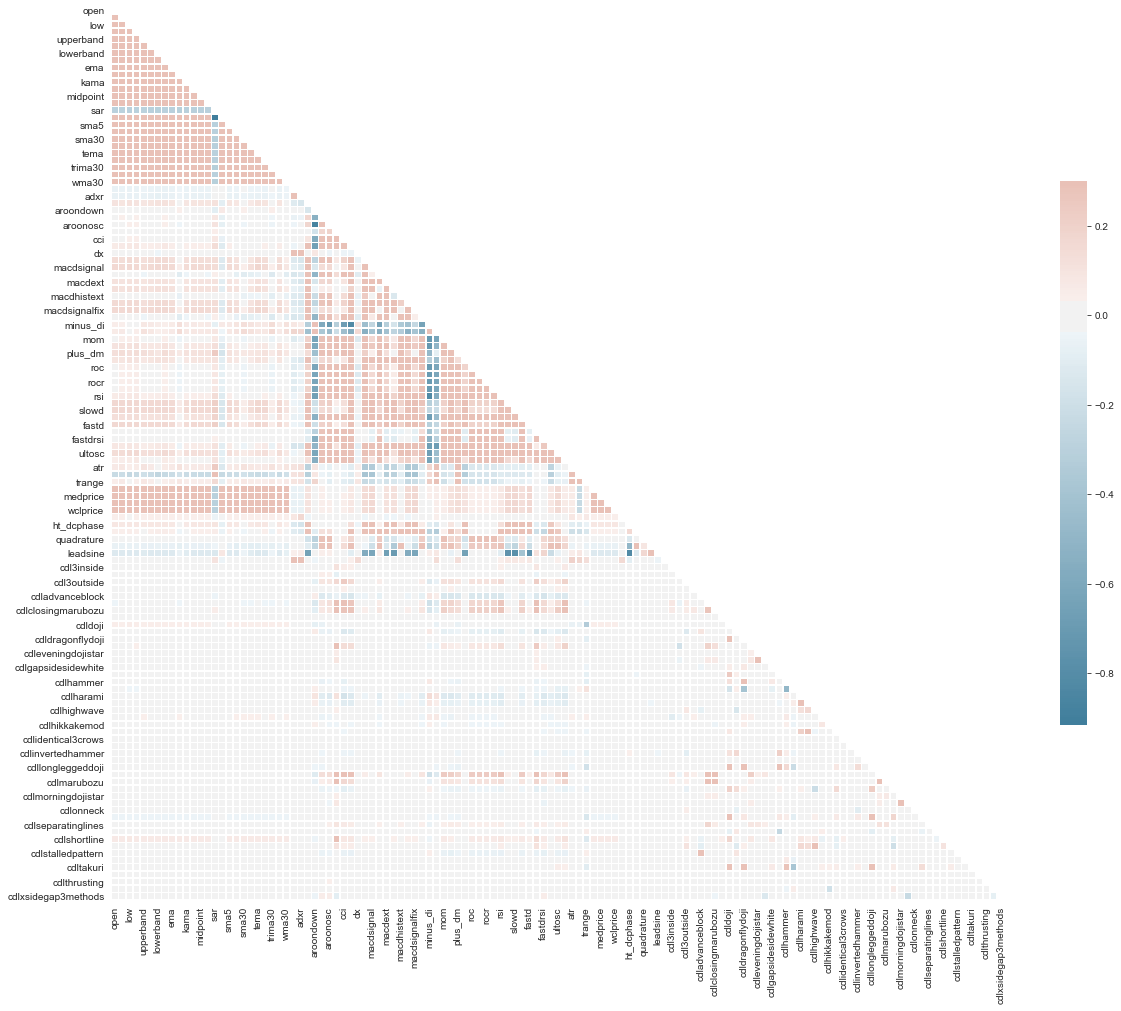

In [16]:
## correlation heatmap

sns.set_style('whitegrid')

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
## ref.https://seaborn.pydata.org/examples/many_pairwise_correlations.html
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            # annot=True, 
            fmt='.3f',   # ref. https://stackoverflow.com/questions/54506626/how-to-understand-seaborns-heatmap-annotation-format
            # annot_kws={'fontsize': 9 },
            cbar_kws={"shrink": .5})
plt.show()


## 2. Data Processing

In [17]:
train_split_frac = 0.85
val_split_frac = 0.9

train_split = int(train_split_frac * int(data.shape[0]))  ## end of train index (exclusive)
val_split = int(val_split_frac * int(data.shape[0]))      ## end of val index (exclusive)

In [18]:
step = 1
past = 10
future = 1
learning_rate = 0.00001
batch_size = 1
epochs = 1000

y = data[['close']]

### 2.1 Train - validation - test split

In [19]:
training_data = data[: train_split]
validation_data = data[train_split: val_split]
test_data = data[val_split:]

In [20]:
print('Shape of training_data:   ', training_data.shape)
print('Shape of validation_data: ', validation_data.shape)
print('Shape of test_data:       ', test_data.shape)

Shape of training_data:    (4023, 125)
Shape of validation_data:  (236, 125)
Shape of test_data:        (474, 125)


### 2.2 Standardisation


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
training_data = scaler.fit_transform(training_data)
validation_data = scaler.transform(validation_data)
test_data = scaler.transform(test_data)

### 2.3 Training dataset

In [23]:
train_y_start = past + future
train_y_end = train_y_start + train_split

In [24]:
x_train = training_data
y_train = y.iloc[train_y_start: train_y_end].values

In [25]:
sequence_length = int(past / step)

In [26]:
import tensorflow as tf
from tensorflow import keras

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

### 2.4 Validation dataset

In [27]:
val_y_start = train_y_end
val_y_end = train_y_start + val_split

In [28]:
x_val = validation_data
y_val = y.iloc[val_y_start: val_y_end].values

In [29]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

### 2.5 Test dataset

In [30]:
x_end = len(test_data) - past - future

In [31]:
test_y_start = val_y_end

In [32]:
x_test = test_data[: x_end]
y_test = y.iloc[test_y_start: ].values

In [33]:
dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

### 2.4 Input and output shape

In [34]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (1, 10, 125)
Target shape: (1, 1)


## 3. Experiment1: LSTM model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import keras

### 3.1 Training

In [36]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(200)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model1 = keras.Model(inputs=inputs, outputs=outputs)
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 125)]         0         
_________________________________________________________________
lstm (LSTM)                  (None, 200)               260800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 261,001
Trainable params: 261,001
Non-trainable params: 0
_________________________________________________________________


In [37]:
path_checkpoint1 = "model_checkpoint_1.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=15)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint1,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model1.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/1000
4014/4014 [==============================] - 27s 6ms/step - loss: 0.1345 - val_loss: 0.0234

Epoch 00001: val_loss improved from inf to 0.02338, saving model to model_checkpoint_1.h5
Epoch 2/1000
4014/4014 [==============================] - 24s 6ms/step - loss: 0.0215 - val_loss: 0.0174

Epoch 00002: val_loss improved from 0.02338 to 0.01740, saving model to model_checkpoint_1.h5
Epoch 3/1000
4014/4014 [==============================] - 26s 6ms/step - loss: 0.0109 - val_loss: 0.0149

Epoch 00003: val_loss improved from 0.01740 to 0.01489, saving model to model_checkpoint_1.h5
Epoch 4/1000
4014/4014 [==============================] - 27s 7ms/step - loss: 0.0069 - val_loss: 0.0112

Epoch 00004: val_loss improved from 0.01489 to 0.01124, saving model to model_checkpoint_1.h5
Epoch 5/1000
4014/4014 [==============================] - 27s 7ms/step - loss: 0.0047 - val_loss: 0.0093

Epoch 00005: val_loss improved from 0.01124 to 0.00931, saving model to model_checkpoint_1.h5
Epoc

4014/4014 [==============================] - 17s 4ms/step - loss: 7.5667e-04 - val_loss: 0.0011

Epoch 00047: val_loss did not improve from 0.00111
Epoch 48/1000
4014/4014 [==============================] - 18s 5ms/step - loss: 7.0201e-04 - val_loss: 0.0012

Epoch 00048: val_loss did not improve from 0.00111
Epoch 49/1000
4014/4014 [==============================] - 20s 5ms/step - loss: 6.7672e-04 - val_loss: 0.0021

Epoch 00049: val_loss did not improve from 0.00111
Epoch 50/1000
4014/4014 [==============================] - 19s 5ms/step - loss: 6.3678e-04 - val_loss: 0.0020

Epoch 00050: val_loss did not improve from 0.00111
Epoch 51/1000
4014/4014 [==============================] - 19s 5ms/step - loss: 6.8102e-04 - val_loss: 0.0016

Epoch 00051: val_loss did not improve from 0.00111
Epoch 52/1000
4014/4014 [==============================] - 18s 5ms/step - loss: 6.8082e-04 - val_loss: 0.0012

Epoch 00052: val_loss did not improve from 0.00111
Epoch 53/1000
4014/4014 [=================

4014/4014 [==============================] - 24s 6ms/step - loss: 2.1775e-04 - val_loss: 5.2225e-04

Epoch 00093: val_loss did not improve from 0.00043
Epoch 94/1000
4014/4014 [==============================] - 24s 6ms/step - loss: 2.9528e-04 - val_loss: 5.6153e-04

Epoch 00094: val_loss did not improve from 0.00043
Epoch 95/1000
4014/4014 [==============================] - 24s 6ms/step - loss: 2.6152e-04 - val_loss: 6.2535e-04

Epoch 00095: val_loss did not improve from 0.00043
Epoch 96/1000
4014/4014 [==============================] - 24s 6ms/step - loss: 2.0509e-04 - val_loss: 4.9438e-04

Epoch 00096: val_loss did not improve from 0.00043
Epoch 97/1000
4014/4014 [==============================] - 26s 7ms/step - loss: 2.2813e-04 - val_loss: 3.7003e-04

Epoch 00097: val_loss improved from 0.00043 to 0.00037, saving model to model_checkpoint_1.h5
Epoch 98/1000
4014/4014 [==============================] - 25s 6ms/step - loss: 2.2118e-04 - val_loss: 4.6657e-04

Epoch 00098: val_loss did 

### 3.2 Train and validation losses

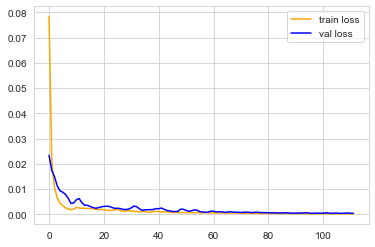

In [38]:
train_loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']
plt.plot(train_loss_1, label='train loss', c='orange')
plt.plot(val_loss_1, label='val loss', c='blue')
plt.legend(loc='best')
plt.show()

### 3.3 Prediction on test dataset

In [39]:
test_prediction_1 = []
test_actual = []
for x, y in dataset_test:
    test_actual.append(y[0][0])
    predict_res = model1.predict(x)[0][0]
    test_prediction_1.append(predict_res)
test_prediction_1 = np.array(test_prediction_1)
test_actual = np.array(test_actual)

### 3.4 Evaluation

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

rmse1 = mean_squared_error(test_actual, test_prediction_1, squared=False)
mape1 = mean_absolute_percentage_error(test_actual, test_prediction_1)
mae1 = mean_absolute_error(test_actual, test_prediction_1)

print('result evaluation')
print('RMSE: ', rmse1)
print('MAPE: ', mape1)
print('MAE:  ', mae1)

result evaluation
RMSE:  0.04787266802753315
MAPE:  0.05805130991830001
MAE:   0.03979113872250797


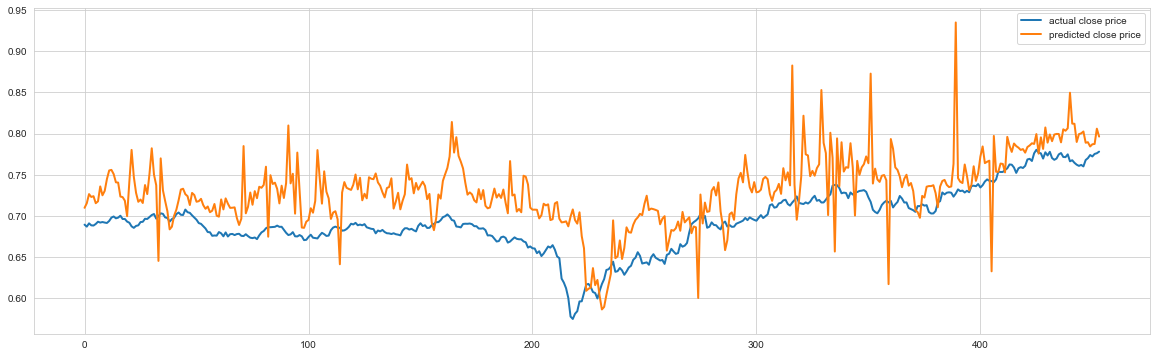

In [41]:
x_axis = [x for x in range(test_actual.shape[0])]
plt.figure(figsize=(20,6))

sns.lineplot(x=x_axis, y=test_actual, label='actual close price', linewidth=2)
sns.lineplot(x=x_axis, y=test_prediction_1, label='predicted close price', linewidth=2)
plt.legend()
plt.show()